<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [35]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2026-01-09 00:23:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  63.9MB/s    in 2.4s    

2026-01-09 00:23:05 (63.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [36]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn

# Import libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [37]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [38]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [39]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
##print(df_check.head(5))
print(df_check.shape)
print(df_check.columns.tolist())
df_check.to_csv("survey_data_cleaned_db.csv", index=False)

(5, 114)
['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToW

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [40]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [41]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)



hello


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [42]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)

QUERY = """
SELECT CompTotal
FROM main where CompTotal is not null
"""
pd.read_sql_query(QUERY, conn)


,CompTotal
0,2040000.0
1,28000.0
2,85000.0
3,50000.0
4,110000.0
...,...
33735,36000.0
33736,40000.0
33737,61000.0
33738,58000.0


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [43]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


Valid CompTotal count: 10


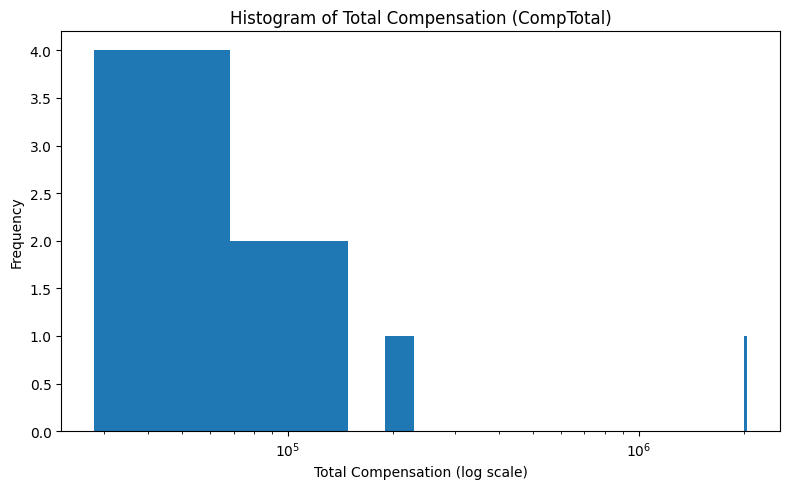

In [44]:
## Write your code here
# Run a simple query to check the data
QUERY = "SELECT CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)
##Convert CompTotal to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

##Create comp from df (this was missing)
comp = df['CompTotal'].dropna().head(10)

##Keep only positive values (required for log scale)
comp = comp[comp > 0]

# Debug check (IMPORTANT)
print("Valid CompTotal count:", comp.shape[0])
##print(comp.describe())

##Plot histogram
plt.figure(figsize=(8,5))
plt.hist(comp, bins=50)
plt.xscale('log')
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation (log scale)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**Box Plots**

Plot a box plot of Age.


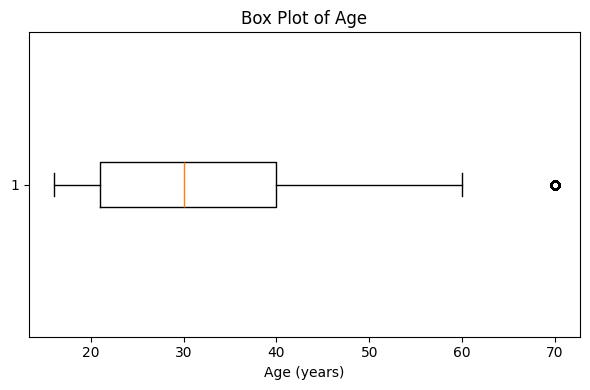

In [45]:
## Write your code here

# Run a simple query to check the data
QUERY = "SELECT Age FROM main"
df = pd.read_sql_query(QUERY, conn)

## Map age ranges to approximate numeric values (midpoints)
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_numeric'] = df['Age'].map(age_map)
age_clean = df['Age_numeric'].dropna()
plt.figure(figsize=(6,4))
plt.boxplot(age_clean, vert=False)
plt.title('Box Plot of Age')
plt.xlabel('Age (years)')
plt.tight_layout()
plt.show()

##Interpretation
##The box plot shows the distribution of respondents’ ages, with the median age lying in the mid-career range. The interquartile range indicates that most
##respondents fall within early-to-mid professional age groups, while a small number of older respondents appear as upper-end outliers.

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


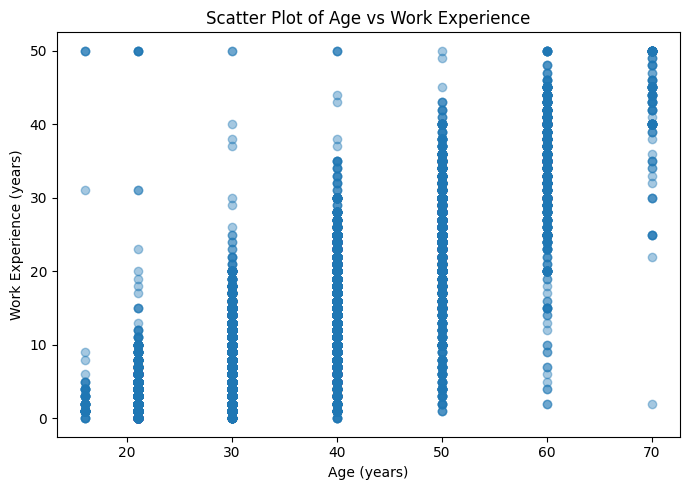

In [46]:
## Write your code here
# Run a simple query to check the data
QUERY = "SELECT Age,WorkExp FROM main"
df = pd.read_sql_query(QUERY, conn)

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df['Age_numeric'] = df['Age'].map(age_map)
df_scatter = df[['Age_numeric', 'WorkExp']].apply(
    pd.to_numeric, errors='coerce'
).dropna()
plt.figure(figsize=(7,5))
plt.scatter(
    df_scatter['Age_numeric'],
    df_scatter['WorkExp'],
    alpha=0.4
)

plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Age (years)')
plt.ylabel('Work Experience (years)')
plt.tight_layout()
plt.show()
##Interpretation
##The scatter plot shows a strong positive relationship between age and work experience. As age increases, work experience generally increases as well, 
##although the relationship is not perfectly linear due to variations in career start age, education length, and career breaks.

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


Empty DataFrame
Columns: [Age, TimeSearching, Frustration]
Index: []


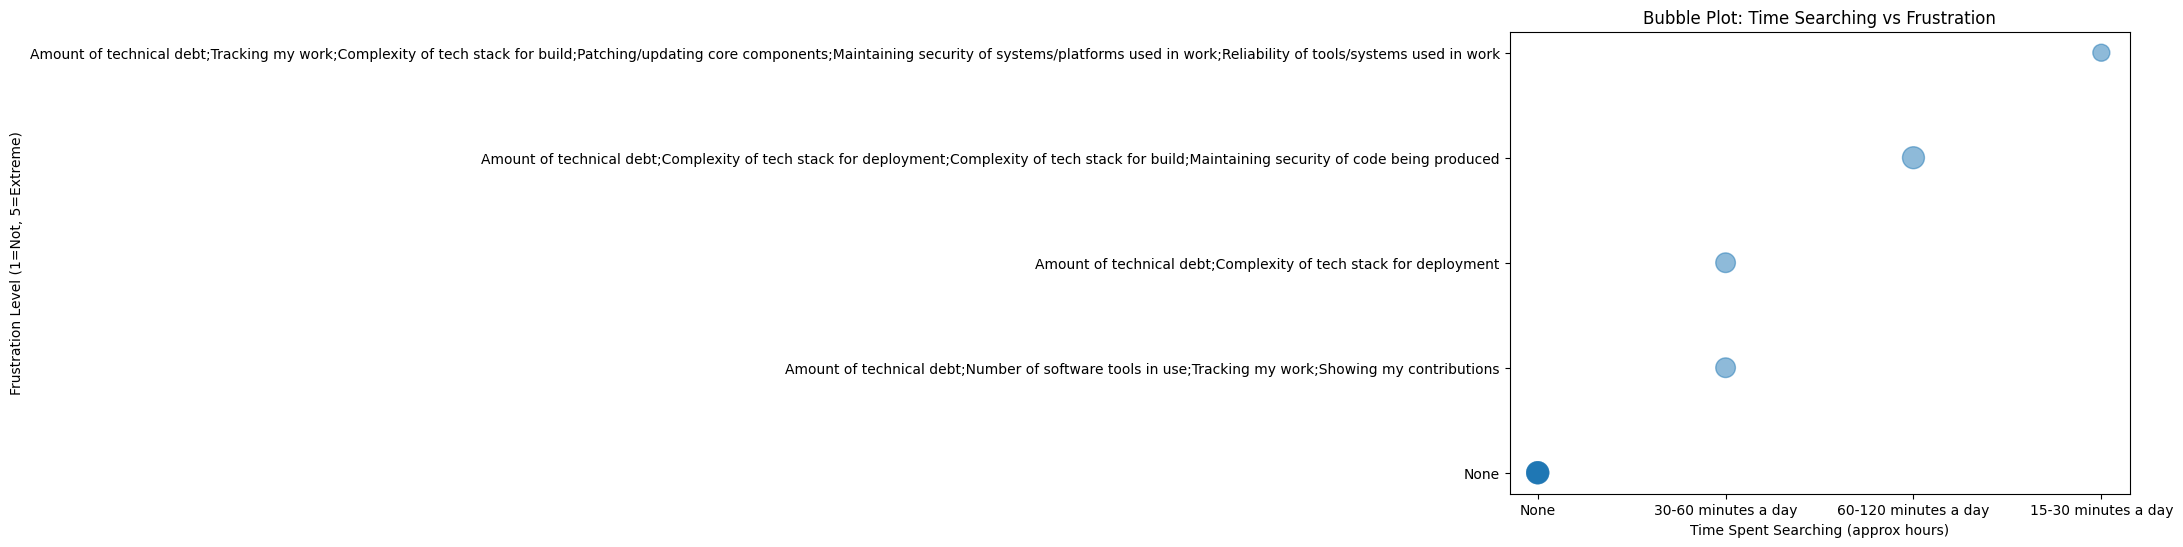

In [47]:
## Write your code here
# Run a simple query to check the data
QUERY = "SELECT Age,TimeSearching,Frustration FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df.head(5).dropna())
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

time_map = {
    'Less than 1 hour': 0.5,
    '1-2 hours': 1.5,
    '3-5 hours': 4,
    '6-10 hours': 8,
    'More than 10 hours': 12
}

frustration_map = {
    'Not frustrated': 1,
    'Slightly frustrated': 2,
    'Moderately frustrated': 3,
    'Very frustrated': 4,
    'Extremely frustrated': 5
}


df['Age_numeric'] = df['Age'].map(age_map).head(20)
df['TimeSearching_clean'] = df['TimeSearching'].astype(str).str.strip().head(20)
df['Frustration_clean'] = df['Frustration'].astype(str).str.strip().head(20)


df_bubble = df[['TimeSearching_clean', 'Frustration_clean', 'Age_numeric']].dropna()


plt.figure(figsize=(8,6))
plt.scatter(
    df_bubble['TimeSearching_clean'],
    df_bubble['Frustration_clean'],
    s=df_bubble['Age_numeric'] * 5,
    alpha=0.5
)
plt.title('Bubble Plot: Time Searching vs Frustration')
plt.xlabel('Time Spent Searching (approx hours)')
plt.ylabel('Frustration Level (1=Not, 5=Extreme)')
plt.show()



### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


       DatabaseWantToWorkWith
1                  PostgreSQL
2  Firebase Realtime Database
3    MongoDB;MySQL;PostgreSQL
4           PostgreSQL;SQLite


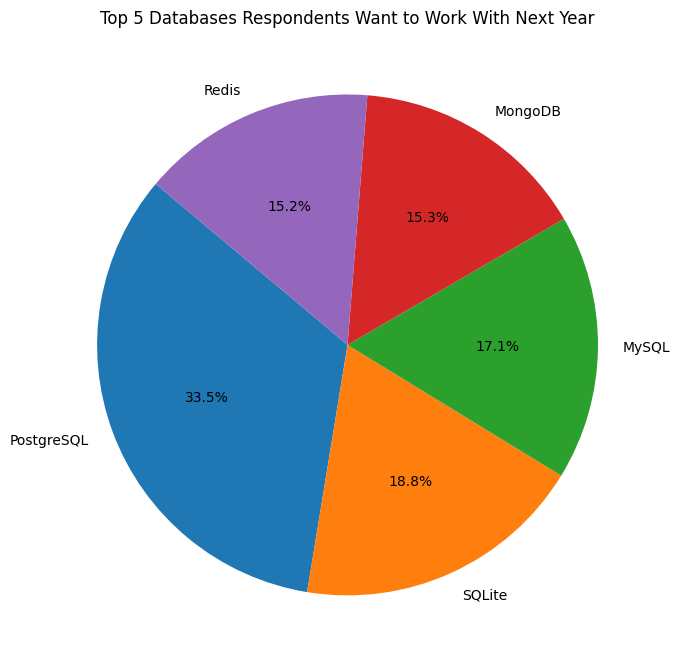

In [51]:
## Write your code here
# Run a simple query to check the data
QUERY = "SELECT DatabaseWantToWorkWith FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df.head(5).dropna())
# Select and clean the column
db_want = df['DatabaseWantToWorkWith'].dropna()

# Split multiple databases into rows
db_want_split = db_want.str.split(';').explode()

# Count top 5 databases
top5_db = db_want_split.value_counts().head(5)
top5_db

plt.figure(figsize=(7,7))
plt.pie(
    top5_db.values,
    labels=top5_db.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Top 5 Databases Respondents Want to Work With Next Year')
plt.tight_layout()
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


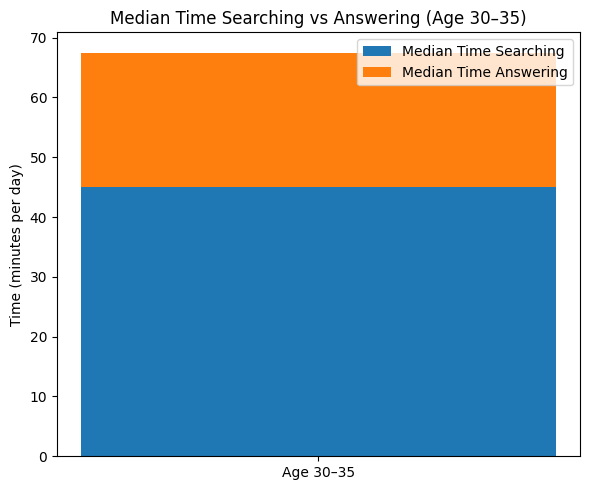

In [75]:
## Write your code here
# Run a simple query to check the data
QUERY = "SELECT Age,TimeSearching,TimeAnswering FROM main"
df = pd.read_sql_query(QUERY, conn)
##print(df.dropna())

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_numeric'] = df['Age'].map(age_map)

time_map = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

df['TimeSearching_num'] = df['TimeSearching'].map(time_map)
df['TimeAnswering_num'] = df['TimeAnswering'].map(time_map)
##print(df['TimeSearching_num'])

df_30_35 = df[
    (df['Age_numeric'] >= 30) &
    (df['Age_numeric'] < 35)
]

median_search = df_30_35['TimeSearching_num'].median()
median_answer = df_30_35['TimeAnswering_num'].median()

median_search, median_answer
plt.figure(figsize=(6,5))

plt.bar(
    ['Age 30–35'],
    [median_search],
    label='Median Time Searching'
)

plt.bar(
    ['Age 30–35'],
    [median_answer],
    bottom=[median_search],
    label='Median Time Answering'
)

plt.ylabel('Time (minutes per day)')
plt.title('Median Time Searching vs Answering (Age 30–35)')
plt.legend()
plt.tight_layout()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


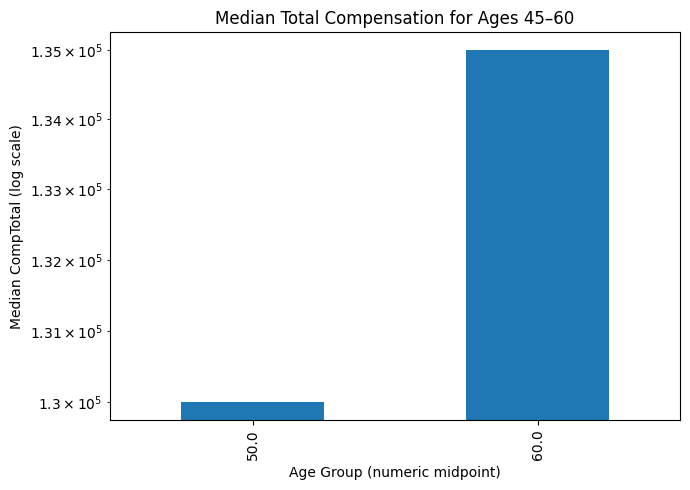

In [76]:
## Write your code here
# Run a simple query to check the data
QUERY = "SELECT Age,CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)
##Convert CompTotal to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df['Age_numeric'] = df['Age'].map(age_map)

df_45_60 = df[
    (df['Age_numeric'] >= 45) &
    (df['Age_numeric'] <= 60)
]

median_comp = (
    df_45_60
    .groupby('Age_numeric')['CompTotal']
    .median()
)
plt.figure(figsize=(7,5))
median_comp.plot(kind='bar')

plt.yscale('log')
plt.ylabel('Median CompTotal (log scale)')
plt.xlabel('Age Group (numeric midpoint)')
plt.title('Median Total Compensation for Ages 45–60')
plt.tight_layout()
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [ ]:
## Write your code here
QUERY = "SELECT MainBranch FROM main"
df = pd.read_sql_query(QUERY, conn)
# Count values in MainBranch
mainbranch_counts = df['MainBranch'].value_counts()
mainbranch_counts

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
